##  Ejercicio 1

Completa la función siguiente para que cargue el dataset mnist desde el fichero `data/mnist1.5k.csv` y extraiga una matriz de 784 columnas con las imágenes MNIST vectorizadas y un vector con las clases a las que pertenece cada imagen.


In [11]:
import numpy as np
def load_mnist():
    #
    # TU CODIGO AQUI
    #
    mnist = np.loadtxt("data/mnist1.5k.csv", delimiter=",")
    numeros=mnist[:,0] #Vector con numeros en la data (numeros ya clasificados)
    pixeles = mnist[:,1:785] #matriz imagenes cada fila una imagen (solo pixeles 784 en total)
    return numeros, pixeles

Mostramos aleatoriamente algunos de los dígitos. Ejecuta la siguiente celda para ver el resultado de tu función

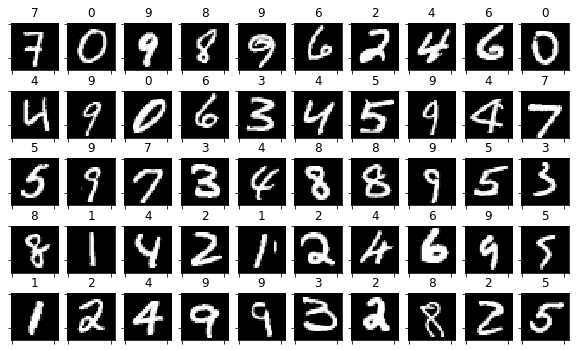

In [13]:
numeros,pixeles= load_mnist()
import matplotlib.pyplot as plt
%matplotlib inline
%run -i code/show_mnist.py
show_sample_mnist(pixeles,numeros)

##  Ejercicio 2

Completa la función siguiente para que, dado una matriz con las imágenes MNIST vectorizadas y un filtro, devuelva una nueva matriz, del mismo tamaño que la anterior, pero a la que a las imágenes vectorizadas se les ha aplicado el filtro.


In [14]:
from scipy.signal import convolve2d

def convolve_mnist(d,f):
    # --------------
    # TU CODIGO AQUI
    r = np.zeros((d.shape[0],d.shape[1]))
    i = 0
    for image in d:
        aux = image.reshape((28,28))
        r[i]= convolve2d(aux, f,mode="same").ravel()
        i+=1
    # ------------
    return r

Mostramos aleatoriamente algunos de los dígitos.

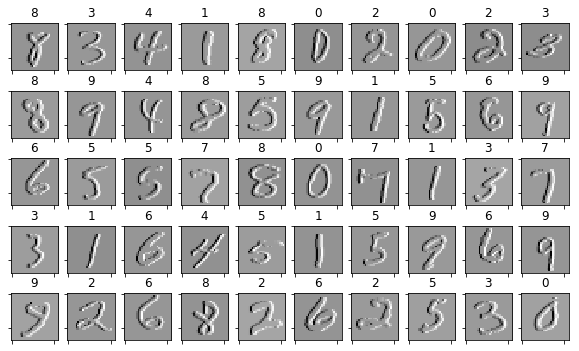

In [15]:
f = np.array([[-1,1]])

dc = convolve_mnist(pixeles,f)

show_sample_mnist(dc,numeros)

## Ejercicio 3

Completa la función siguiente para que dados:

- Una matriz $d$ de $m \times n$, con $m$ datos y $n$ atributos por dato.
- Un vector $c$ de $m$ elementos con la clase a la que pertenece cada dato de la matriz $d$.
- Un clasificador de `sklearn`
- Un porcentaje deseado de datos para test

Haga lo siguiente:

- Divida el $d$ y $c$ en dos partes para entrenamiento y test según el porcentaje deseado
- Entrene el clasificador con los datos de train
- Mida el desempeño con los datos de test
- Devuelva el desempeño medido

In [16]:
from sklearn.cross_validation import train_test_split

def classify(pixels,numeros, classifier, test_size=0.2):
    pixels_train, pixels_test, numeros_train, numeros_test = train_test_split(pixels, 
                                                                     numeros, 
                                                                     test_size=test_size, 
                                                                     random_state=np.random.randint(1,100))
    classifier.fit(pixels_train, numeros_train)
    score =classifier.score(pixels_test, numeros_test)
    # ----------------
    
    return score

Ejecuta la siguiente para ver cómo se comporta tu función

In [20]:
from sklearn.naive_bayes import GaussianNB
numeros,pixeles = load_mnist()
classify(pixeles,numeros,GaussianNB())

0.6166666666666667

## Ejercicio 4

Completa la función siguiente para que llame a a función anterior el número de veces especificado por el parámetro `repeat` y devuelva la media y desviación estándar del desempeño en test.:

In [21]:
def classify_avg(pixeles,numeros,classifier,repeat=10, test_size=0.2):
    lista=[]
    for i in range(repeat):
         lista.append(classify(pixeles,numeros,classifier,test_size))
    mean_performance = np.mean(lista)
    std_performance  = np.std(lista)
    # -------------------
    
    return mean_performance, std_performance

Ejecuta la siguiente para ver cómo se comporta tu función

In [22]:
from sklearn.naive_bayes import GaussianNB
classify_avg(pixeles,numeros,GaussianNB())

(0.60899999999999999, 0.02016873267654111)

## Ejercicio 5

Completa la función siguiente para que:

- Cargue el dataset MNIST
- Use la función del ejercicio anterior para clasificar MNIST con un GaussianNB
- Use la función del ejercicio anterior para clasificar MNIST con un DecisionTreeClassifier


In [23]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.naive_bayes import GaussianNB

def NBDT_MNIST(pixels,nums):
    clf_g = GaussianNB()
    clf_tree = DecisionTreeClassifier()
    numeros=nums
    pixeles=pixels
    meanNB, stdNB = classify_avg(pixeles,numeros,clf_g)
    meanDT, stdDT = classify_avg(pixeles,numeros,clf_tree)

    return meanNB, stdNB, meanDT, stdDT
    

Ejecuta la siguiente para ver cómo se comporta tu función

In [25]:
meanNB, stdNB, meanDT, stdDT = NBDT_MNIST(pixeles,numeros)
print ("Gaussian      %.3f (+/- %.3f)"%(meanNB, stdNB))
print ("Decision Tree %.3f (+/- %.3f)"%(meanDT, stdDT))

Gaussian      0.594 (+/- 0.014)
Decision Tree 0.687 (+/- 0.021)


## Ejercicio 6

Completa la función siguiente para que:

- Cargue el dataset MNIST
- Realice la convolución de todas las imágenes con el filtro indicado
- Use la función del ejercicio 5 para clasificar MNIST con un GaussianNB
- Use la función del ejercicio 5 para clasificar MNIST con un DecisionTreeClassifier

In [26]:
def NBDT_MNIST_convolution1():

    numeros,pixeles= load_mnist()
    f   = np.array([[-1,1]])
    dc  = convolve_mnist(pixeles,f)

    meanNB, stdNB,meanDT, stdDT = NBDT_MNIST(pixeles,numeros)
    
    return meanNB, stdNB, meanDT, stdDT

Ejecuta la siguiente para ver cómo se comporta tu función

In [27]:
meanNB, stdNB, meanDT, stdDT = NBDT_MNIST_convolution1()
print ("Gaussian      %.3f (+/- %.3f)"%(meanNB, stdNB))
print ("Decision Tree %.3f (+/- %.3f)"%(meanDT, stdDT))

Gaussian      0.578 (+/- 0.032)
Decision Tree 0.682 (+/- 0.016)


## Ejercicio 7

Completa la función siguiente para que:

- Cargue el dataset MNIST
- Realice la convolución de todas las imágenes con un filtro de $4\times 4$ (el parámetro de la función) con todos los elementos a 1.
- Use la función del ejercicio 5 para clasificar MNIST con un GaussianNB
- Use la función del ejercicio 5 para clasificar MNIST con un DecisionTreeClassifier

In [28]:
def NBDT_MNIST_convolution2():

    numeros, pixeles=load_mnist()
    f   = np.ones((4,4))
    dc  = convolve_mnist(pixeles,f)
    
    meanNB, stdNB, meanDT, stdDT = NBDT_MNIST(dc,numeros)

    return meanNB, stdNB, meanDT, stdDT

Ejecuta la siguiente para ver cómo se comporta tu función

In [29]:
meanNB, stdNB, meanDT, stdDT = NBDT_MNIST_convolution2()
print ("Gaussian      %.3f (+/- %.3f)"%(meanNB, stdNB))
print ("Decision Tree %.3f (+/- %.3f)"%(meanDT, stdDT))

Gaussian      0.585 (+/- 0.035)
Decision Tree 0.725 (+/- 0.024)


## Ejercicio 8

Completa la función siguiente para que:

- Cargue el dataset MNIST
- Discretice las imágenes de forma que cualquier pixel con valor $\ge 1$ quede a 1.
- Realice la convolución de todas las imágenes con un filtro de $4 \times 4$ con todos los elementos a 1.
- Use la función del ejercicio 5 para clasificar MNIST con un GaussianNB
- Use la función del ejercicio 5 para clasificar MNIST con un DecisionTreeClassifier

In [30]:
def NBDT_MNIST_convolution3():

    numeros, pixeles=load_mnist()
    f = np.ones((4,4))
    pixeles[pixeles>=1]=1
    dc  = convolve_mnist(pixeles,f)

    meanNB, stdNB, meanDT, stdDT = NBDT_MNIST(dc,numeros)
    show_sample_mnist(dc,numeros)

    return meanNB, stdNB, meanDT, stdDT

Ejecuta la siguiente para ver cómo se comporta tu función

Gaussian      0.593 (+/- 0.028)
Decision Tree 0.749 (+/- 0.029)


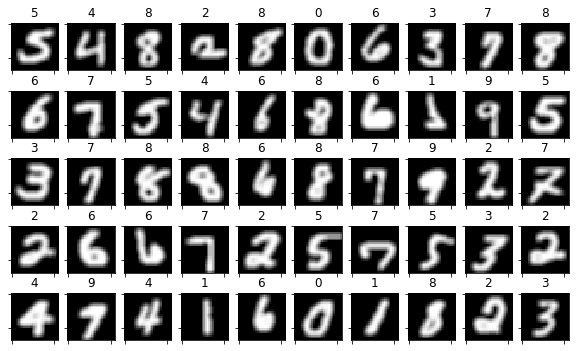

In [31]:
meanNB, stdNB, meanDT, stdDT = NBDT_MNIST_convolution3()
print ("Gaussian      %.3f (+/- %.3f)"%(meanNB, stdNB))
print ("Decision Tree %.3f (+/- %.3f)"%(meanDT, stdDT))

Si visualizas una muestra de los dígitos de MNIST una vez aplicadas las tranformaciones del ejercicio anterior debe de quedar así.

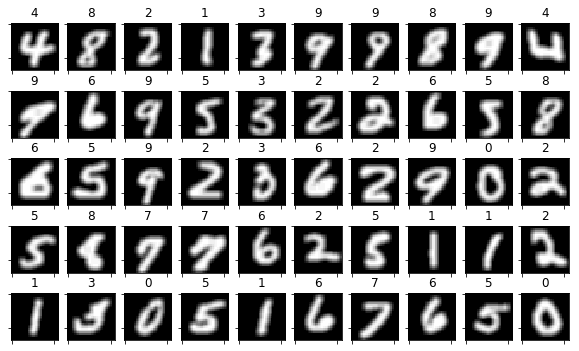

In [32]:
numeros,pixeles = load_mnist()
f  = np.ones((4,4))
dc = np.copy(pixeles)
dc[dc>=1] = 1
dc = convolve_mnist(dc,f)
show_sample_mnist(dc,numeros)